In [73]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
import time


In [74]:
x_train = np.load("./Xtrain_Classification_Part1.npy")
y_train = np.load("./Ytrain_Classification_Part1.npy")
x_test = np.load("./Xtest_Classification_Part1.npy")


In [75]:
x_train_reshaped = x_train.reshape((x_train.shape[0],50,50))
x_test_reshaped = x_test.reshape((x_test.shape[0],50,50))

x_train_reshaped = x_train_reshaped.reshape(-1, 50,50, 1)
x_test_reshaped = x_test_reshaped.reshape(-1, 50,50, 1)

x_train_reshaped = x_train_reshaped.astype('float32')
x_test_reshaped = x_test_reshaped.astype('float32')

In [76]:
x_train_reshaped = x_train_reshaped/255
x_test_reshaped = x_test_reshaped/255

In [77]:
train_Y_one_hot = to_categorical(y_train)


In [78]:
train_X,valid_X,train_label,valid_label = train_test_split(x_train_reshaped, train_Y_one_hot, test_size=0.2, random_state=13)


In [79]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((5210, 50, 50, 1), (1303, 50, 50, 1), (5210, 2), (1303, 2))

In [80]:
batch_size = 128
epochs = 20
num_classes = 2

In [81]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(50,50,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [82]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [83]:
model_train = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
41/41 [==============================] - 18s 433ms/step - loss: 0.6772 - accuracy: 0.5791 - val_loss: 0.6103 - val_accuracy: 0.6546
Epoch 2/20
41/41 [==============================] - 19s 463ms/step - loss: 0.6027 - accuracy: 0.6591 - val_loss: 0.5725 - val_accuracy: 0.6984
Epoch 3/20
41/41 [==============================] - 19s 457ms/step - loss: 0.5559 - accuracy: 0.7150 - val_loss: 0.5253 - val_accuracy: 0.7559
Epoch 4/20
41/41 [==============================] - 19s 451ms/step - loss: 0.5017 - accuracy: 0.7543 - val_loss: 0.4701 - val_accuracy: 0.7936
Epoch 5/20
41/41 [==============================] - 16s 398ms/step - loss: 0.4444 - accuracy: 0.7937 - val_loss: 0.4439 - val_accuracy: 0.7982
Epoch 6/20
41/41 [==============================] - 16s 399ms/step - loss: 0.4081 - accuracy: 0.8167 - val_loss: 0.3888 - val_accuracy: 0.8204
Epoch 7/20
41/41 [==============================] - 17s 415ms/step - loss: 0.3770 - accuracy: 0.8305 - val_loss: 0.3724 - val_accuracy: 0.8373

In [84]:
y_test = model.predict(x_test_reshaped)

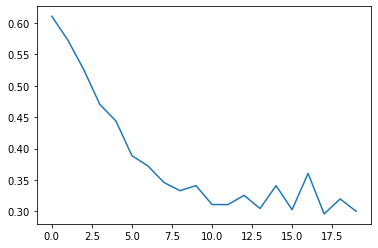

In [85]:
plt.plot(model_train.history["val_loss"])

In [86]:
#for i in range(y_test.shape[0]):
#    if np.argmax(y_test[i])==0:
#        print("male")
#    else:
#        print("female")
#    plt.imshow(x_test_reshaped[i])#,cmap="Greys"
#    plt.show()
#    time.sleep( 5 )

submit vector of labels(1 or 0)
search other options (classifiers) besides cnn and mlp (try svm, hyperparameters linear svm - C look at the weight vector (eye region and mouth weights will influence on the ethnicity and gender classification), nonlinear svm - C,gamma(rbf))
